# General analysis of the database

Visualizing the inital database distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helper
import pandas as pd

In [2]:
post_data = helper.load_post_data('./data/analyzed.jsonl')
user_data = helper.load_user_data('./data/dump-users-last-interaction.json')

In [3]:
questions = np.array([0,0,0])
answers = np.array([0,0,0])
comments_answer = np.array([0,0,0])
comments_question = np.array([0,0,0])

for p in post_data.values():
    questions[p['body_sentiment']] += 1
    for c in p['comments']: comments_question[c['text_sentiment']] += 1

    for a in p['answers']:
        answers[a['body_sentiment']] += 1
        for c in a['comments']: comments_answer[c['text_sentiment']] += 1

data = pd.DataFrame({
    'Categoria': ['Perguntas'] * 3 + ['Respostas'] * 3 + ['Comentários_Respostas'] * 3 + ['Comentários_Perguntas'] * 3,
    'Sentimento': ['Negativo', 'Neutro', 'Positivo'] * 4,
    'Count': np.concatenate([questions, answers, comments_answer, comments_question])
})

data['Density'] = data['Count'] / data.groupby('Categoria')['Count'].transform('sum')

#Get overall data too
overall = data.groupby('Sentimento')['Count'].sum().reset_index()
overall['Density'] = overall['Count'] / overall['Count'].sum()
overall['Categoria'] = 'Geral'
data = pd.concat([overall,data])

data.head()

,Sentimento,Count,Density,Categoria
0,Negativo,449212,0.072801,Geral
1,Neutro,4920373,0.797412,Geral
2,Positivo,800839,0.129787,Geral
0,Negativo,120803,0.120803,Perguntas
1,Neutro,720892,0.720892,Perguntas


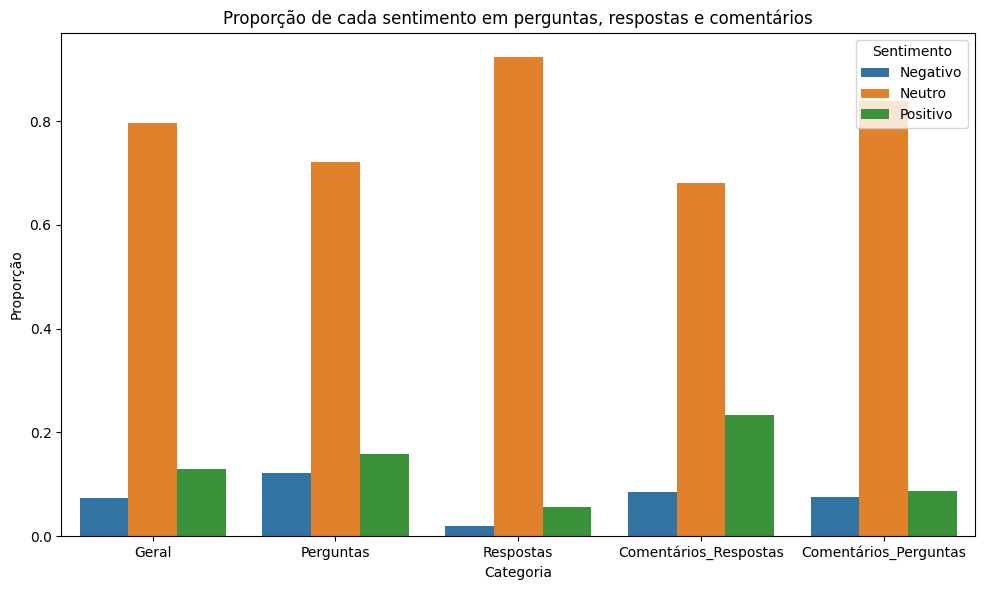

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Categoria', y='Density', hue='Sentimento', data=data)
plt.ylabel('Proporção')
plt.title('Proporção de cada sentimento em perguntas, respostas e comentários')

plt.tight_layout()
plt.savefig('img/general-proportion.pdf')

Text(0.5, 1.0, "Distribution of Users' Average Sentiment")

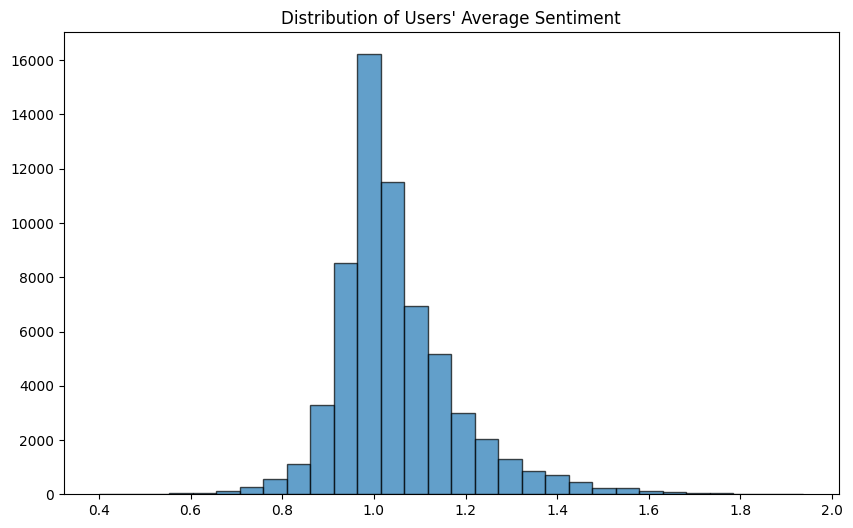

In [5]:
#Average sentiment per user
users_average_sentiment = helper.get_users_average_sentiment(post_data, 15)
sentiment_values = [sentiment for user_id, sentiment in users_average_sentiment.items() if user_id is not None]

plt.figure(figsize=(10, 6))
plt.hist(sentiment_values, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Users\' Average Sentiment')

Text(0.5, 1.0, "Distribution of Posts' Average Sentiment")

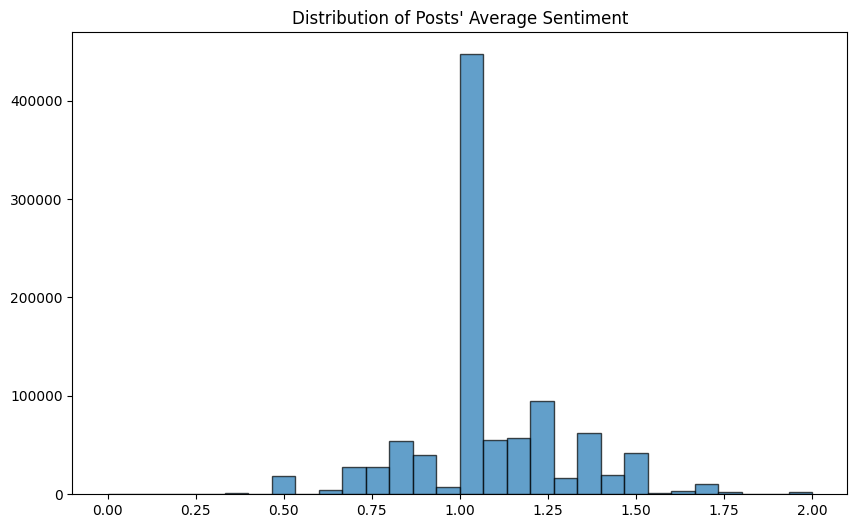

In [13]:
avg = [helper.get_post_average_sentiment(p) for p in post_data.values()]

plt.figure(figsize=(10, 6))
plt.hist(avg, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Posts\' Average Sentiment')


In [11]:
sentiment = []
lengths = []

for p in post_data.values():
    sentiment.append(p['body_sentiment'])
    lengths.append(p['body_len'])
    #for c in p['comments']: 
        #sentiment.append(c['text_sentiment'])
        #lengths.append(c['text_len'])

    for a in p['answers']:
        sentiment.append(a['body_sentiment'])
        lengths.append(a['body_len'])
        #for c in p['comments']: 
            #sentiment.append(c['text_sentiment'])
            #lengths.append(c['text_len'])

(0.0, 2500.0)

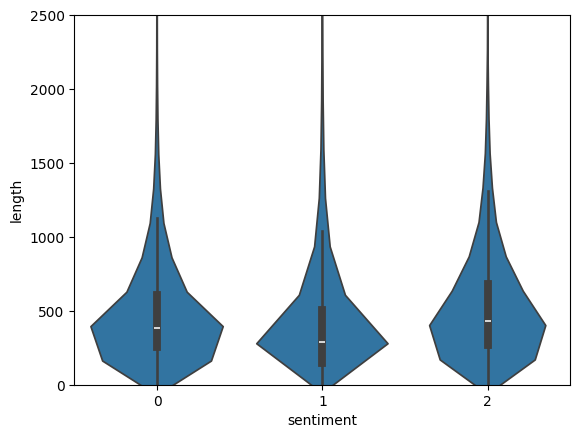

In [14]:
sns.violinplot({'sentiment': sentiment, 'length': lengths}, x='sentiment', y='length')
plt.ylim(0,2500)

In [ ]:
#Sentiment flow
matrix = np.zeros((3,3))
for p in post_data.values():
    body = p['body_sentiment']
    for c in p['comments']: 
        matrix[body, c['text_sentiment']] += 1

    for a in p['answers']:
        body = a['body_sentiment']
        for c in p['comments']: 
            matrix[body, c['text_sentiment']] += 1

#Normalize
matrix = matrix / matrix.sum(axis=1, keepdims=True)
matrix #nao muda muito

array([[0.08833344, 0.83039838, 0.08126819],
       [0.07326595, 0.84844066, 0.07829339],
       [0.07712561, 0.81374022, 0.10913418]])